<a href="https://colab.research.google.com/github/dohyung-kim/ccri/blob/main/script/adm0/pillar1_processing_adm0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import glob
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import normaltest, probplot, skew, kurtosis

Summarize P1 layers

In [9]:
# Folder containing the CSV files
path = r'/content/drive/MyDrive/p1_exposure'
all_files = glob.glob(path + "/*.csv")

for file in all_files:
    # Exclude the specified file
    df = pd.read_csv(file, index_col=None, header=0)
    filename_only = file.split('/')[-1]
    first_two_words = '_'.join(filename_only.split('_')[:2])
    print(f"{first_two_words}: {df['child_population_exposed'].sum()}")


river_flood: 346051263.5261377
coastal_flood: 31956701.209408574
pluvial_flood: 1397061651.339212
drought_sma: 527877594.50252306
agricultural_drought: 764648424.079387
heatwave_frequency: 1055109473.823384
drought_spi: 1653162430.5734508
heatwave_duration: 1532015079.1633563
tropical_storm: 659872662.6840999
heatwave_severity: 338145790.6548762
extreme_heat: 864699161.2305682
fire_frequency: 141860819.25969723
fire_FRP: 88142188.02983323
sand_dust: 130956892.34457363
vectorborne_malariapv: 626165044.4081662
vectorborne_malariapf: 704127417.4893782
air_pollution: 1943463815.5194912


Hazard data normalization test with plots

In [10]:
#define function to remove outliers and find min max values to reduce skew
def trim_outliers_iteratively(values, max_skew=2, max_kurtosis=3.5):
    """
    Iteratively removes extreme min/max values until skewness <= 2 and kurtosis <= 3.5.
    Returns the trimmed dataset along with the final min and max.
    """
    # values = values.dropna().values  # Ensure no NaNs
    # values = np.log1p(values)
    while True:
        current_skew = skew(values)
        current_kurtosis = kurtosis(values)

        if abs(current_skew) <= max_skew and current_kurtosis <= max_kurtosis:
            break  # Stop if conditions are met

        # Remove min and max values
        min_val, max_val = values.min(), values.max()
        values = values[(values > min_val) & (values < max_val)]  # Trim extreme min/max

    return values, values.min(), values.max()

In [11]:
def boxplot_outlier_detection(values):
    """
    Detect outliers using the IQR method (1.5 IQR rule).
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.percentile(values, 25)
    Q3 = np.percentile(values, 75)
    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return values that are within bounds
    return values[(values >= lower_bound) & (values <= upper_bound)], lower_bound, upper_bound

ploting normalized absolute exposure

processed : river_flood min: 0.1 max: 7.874520335036511
river_flood: Log Transformation and Scaling - skew=-0.113, kurtosis=-1.693
IQR processed : river_flood min: -7.82474803259943 max: 13.307913387665717


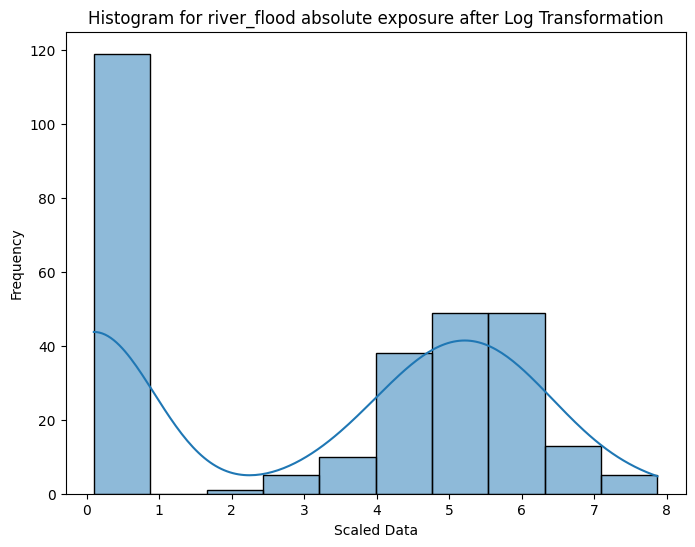

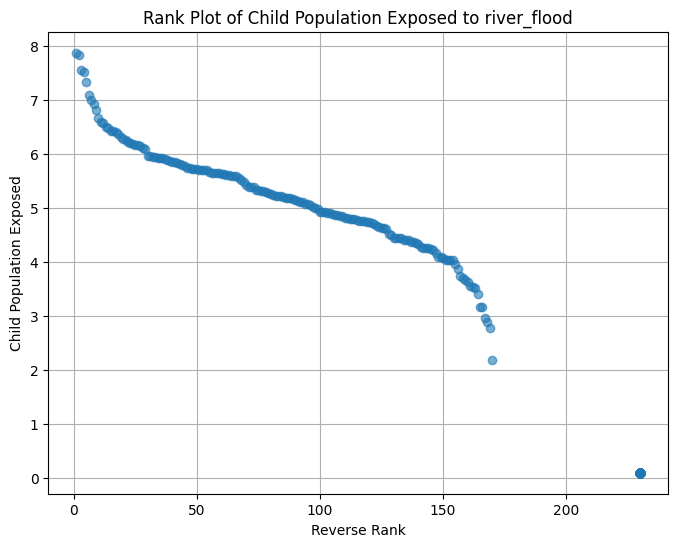

processed : coastal_flood min: 0.1 max: 7.122037104702413
coastal_flood: Log Transformation and Scaling - skew=0.451, kurtosis=-1.192
IQR processed : coastal_flood min: -5.118832657208333 max: 8.798054428680555


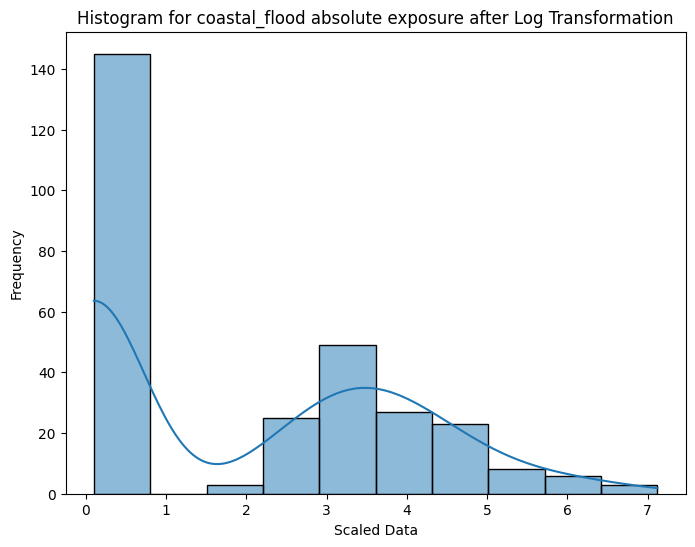

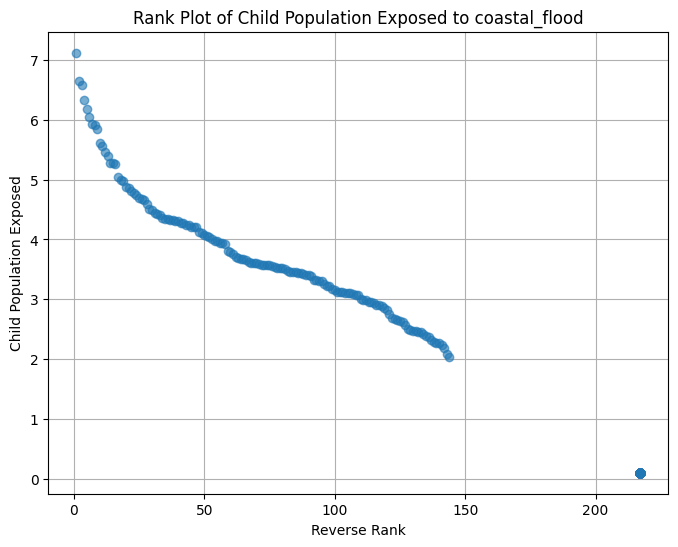

processed : pluvial_flood min: 0.1 max: 8.477496731449124
pluvial_flood: Log Transformation and Scaling - skew=-0.606, kurtosis=-1.230
IQR processed : pluvial_flood min: -9.332658036745158 max: 15.821096727908596


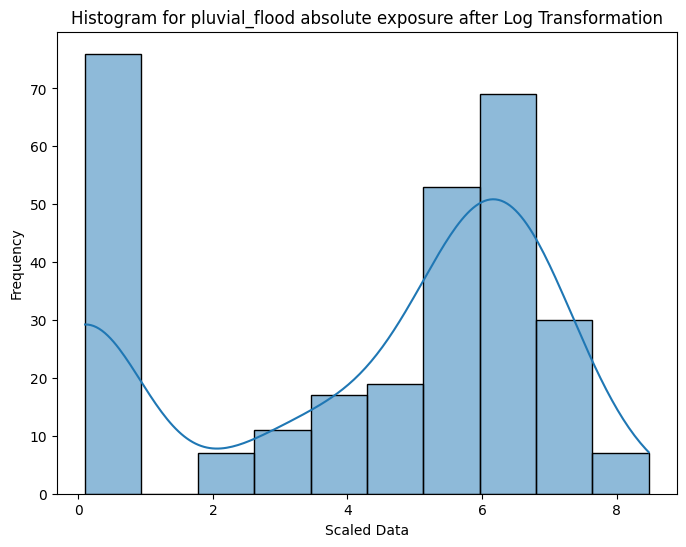

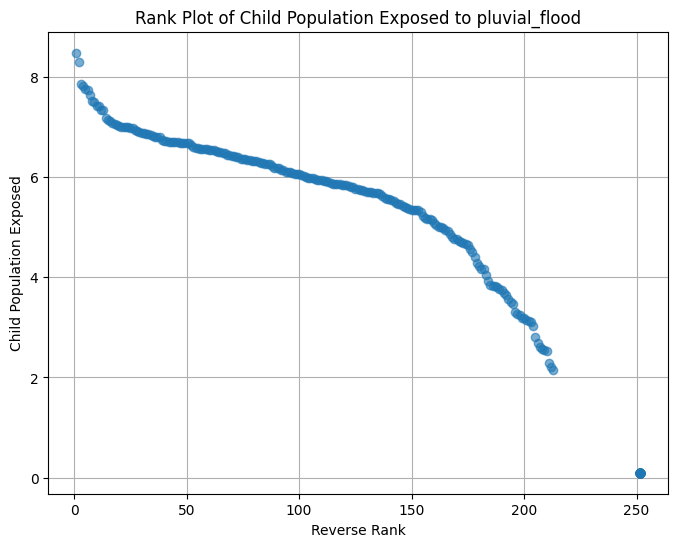

processed : drought_sma min: 0.1 max: 7.948702226156577
drought_sma: Log Transformation and Scaling - skew=0.356, kurtosis=-1.661
IQR processed : drought_sma min: -8.29777587176343 max: 14.096293119605715


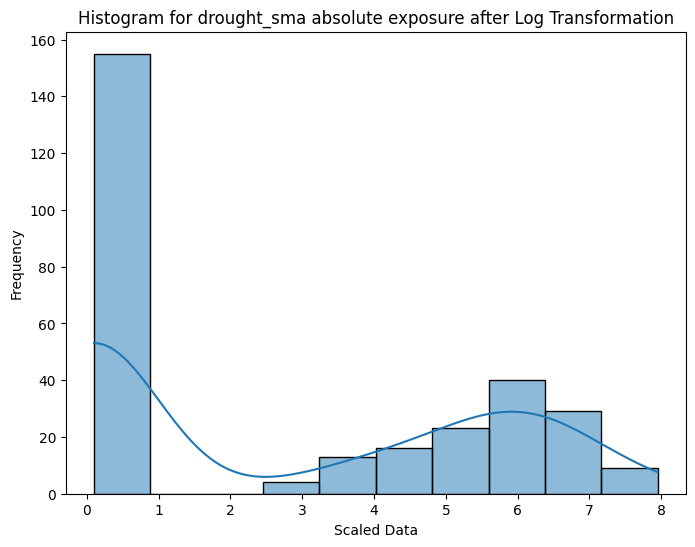

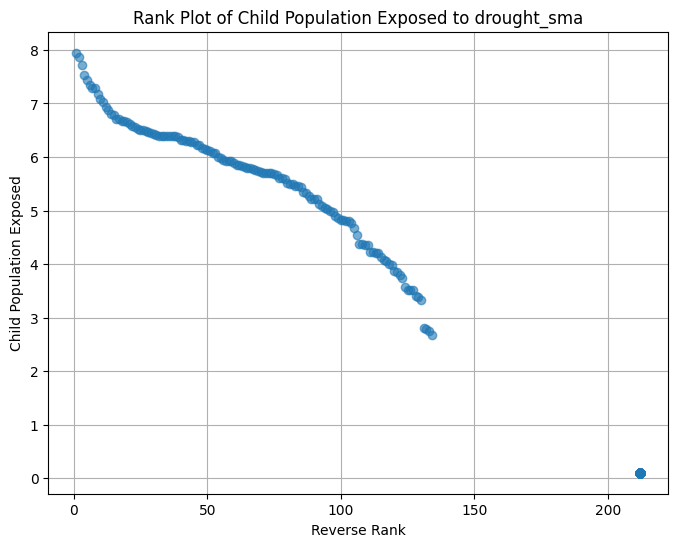

processed : agricultural_drought min: 0.1 max: 8.384877295686907
agricultural_drought: Log Transformation and Scaling - skew=0.129, kurtosis=-1.587
IQR processed : agricultural_drought min: -7.71870564103201 max: 13.131176068386683


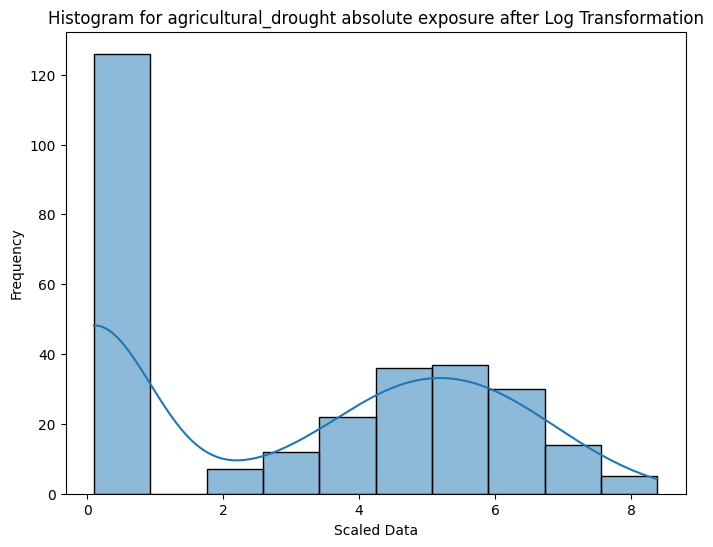

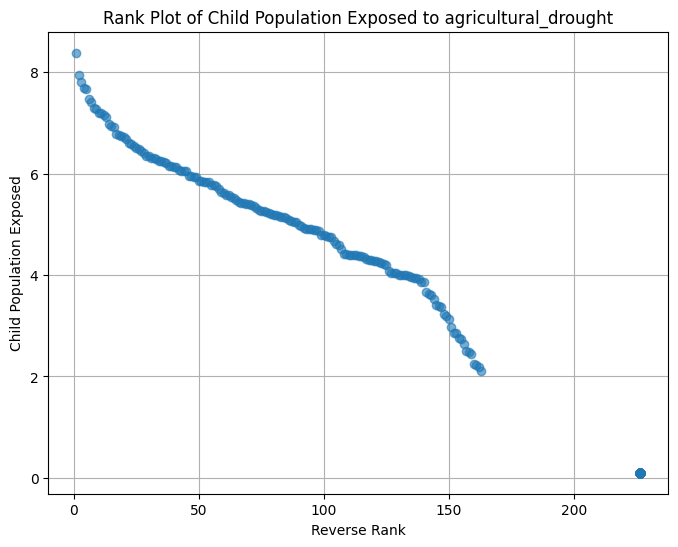

processed : heatwave_frequency min: 0.1 max: 8.307471231690446
heatwave_frequency: Log Transformation and Scaling - skew=-0.536, kurtosis=-1.349
IQR processed : heatwave_frequency min: -9.220174753218553 max: 15.633624588697586


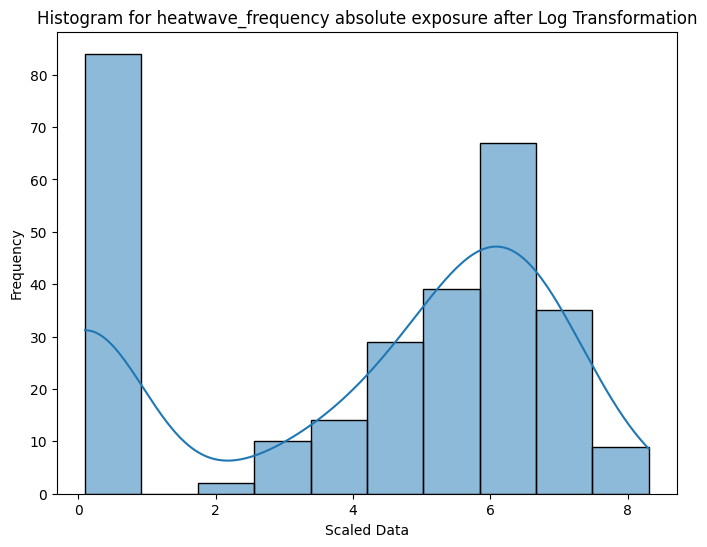

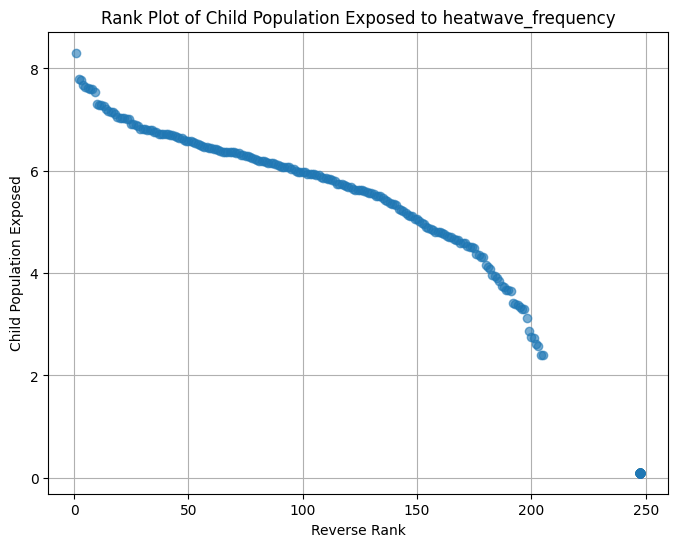

processed : drought_spi min: 0.1 max: 8.586360643578677
drought_spi: Log Transformation and Scaling - skew=-0.318, kurtosis=-1.511
IQR processed : drought_spi min: -9.105578289857919 max: 15.44263048309653


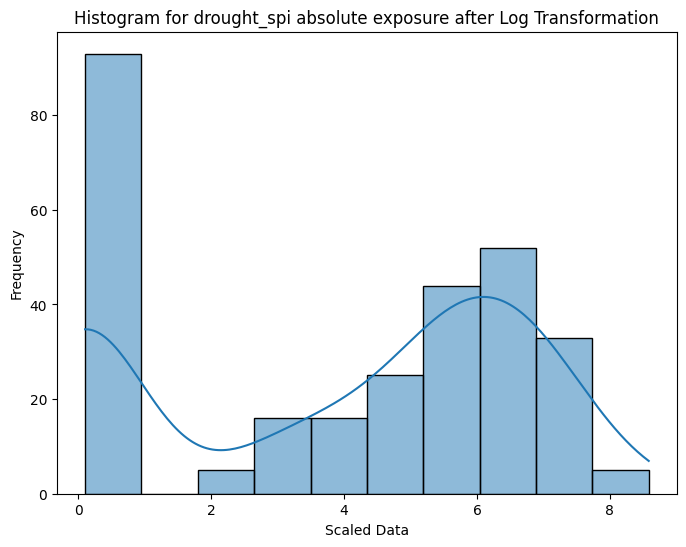

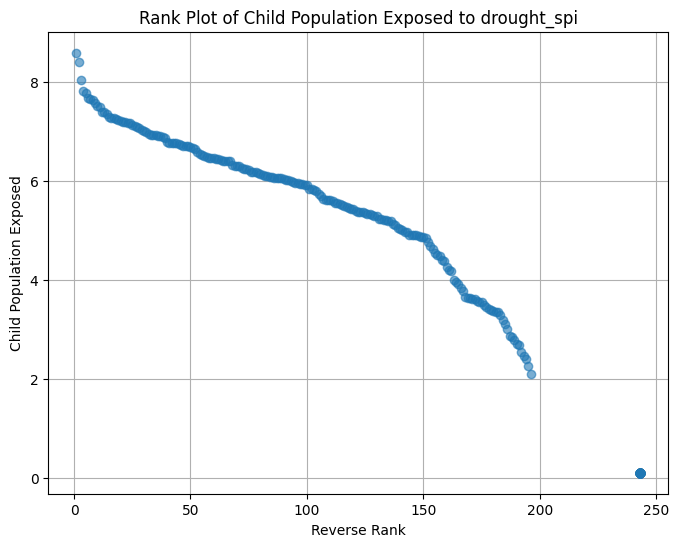

processed : heatwave_duration min: 0.1 max: 8.471391278936403
heatwave_duration: Log Transformation and Scaling - skew=-0.467, kurtosis=-1.422
IQR processed : heatwave_duration min: -9.3086726361543 max: 15.781121060257167


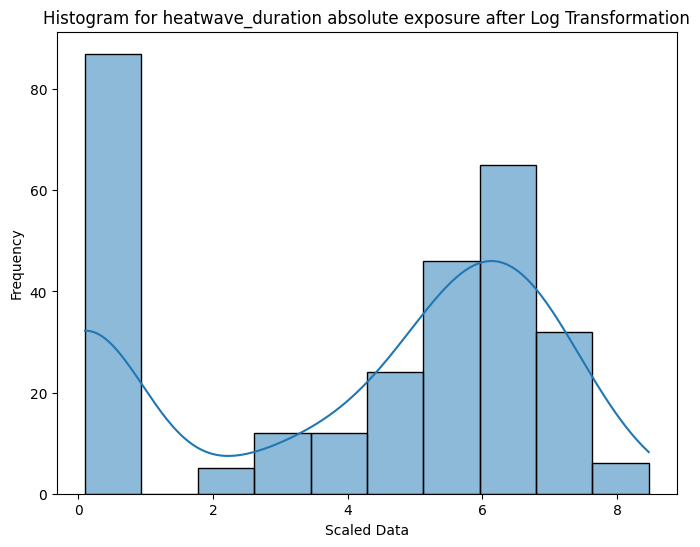

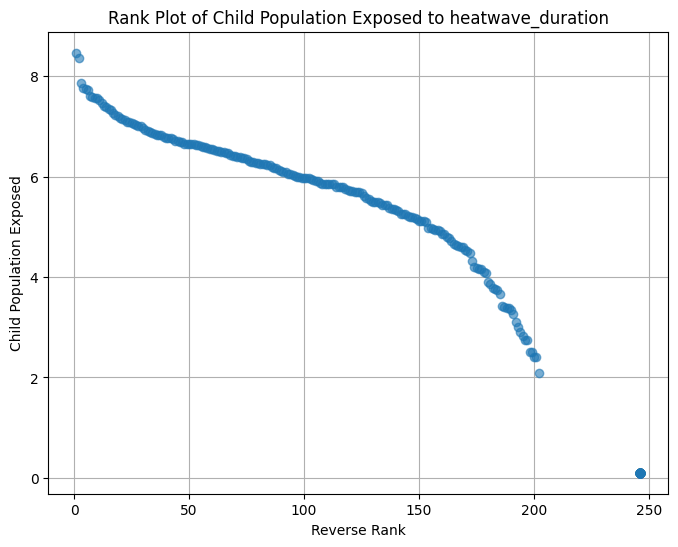

processed : tropical_storm min: 0.1 max: 8.194886653196656
tropical_storm: Log Transformation and Scaling - skew=0.713, kurtosis=-1.155
IQR processed : tropical_storm min: -6.747012705689156 max: 11.51168784281526


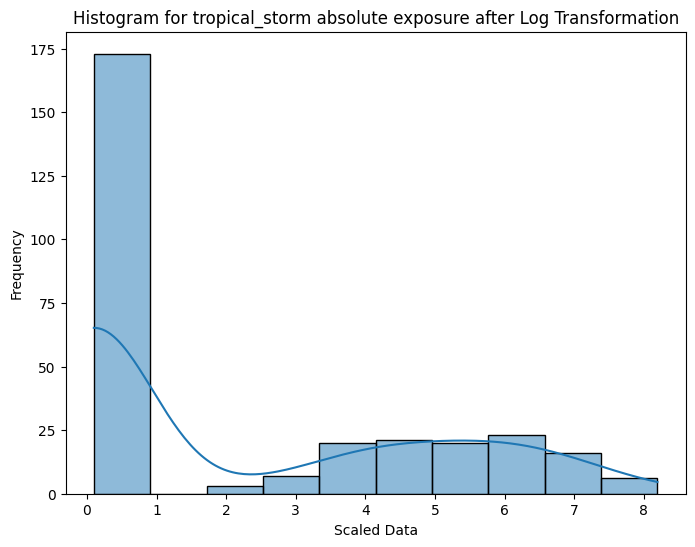

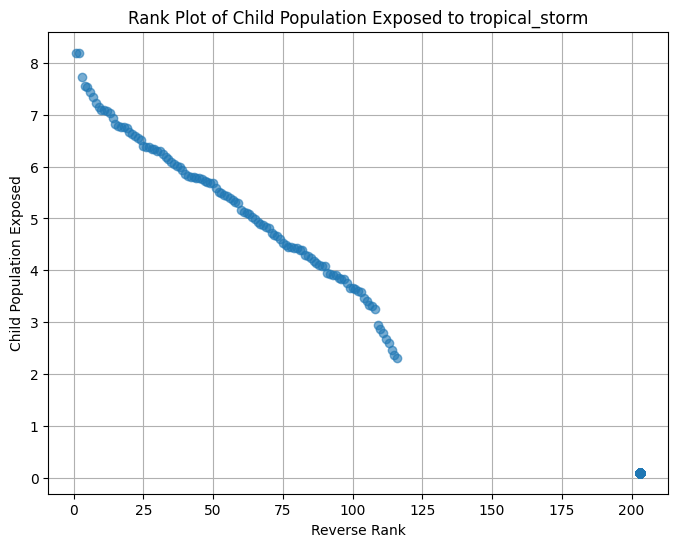

processed : heatwave_severity min: 0.1 max: 7.812985695138427
heatwave_severity: Log Transformation and Scaling - skew=0.875, kurtosis=-1.088
IQR processed : heatwave_severity min: -7.573494749868326 max: 12.889157916447209


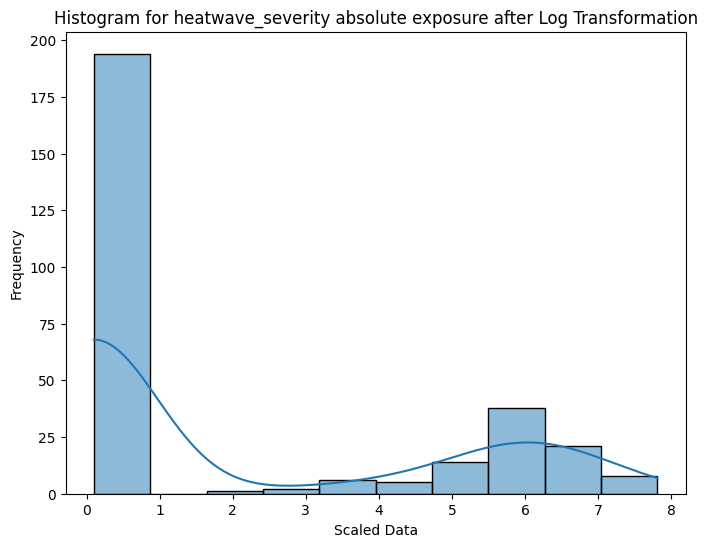

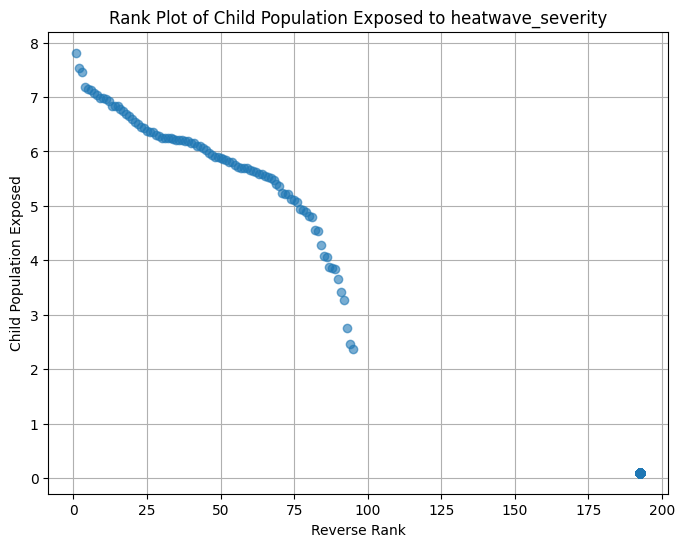

processed : extreme_heat min: 0.1 max: 8.557346332953356
extreme_heat: Log Transformation and Scaling - skew=0.711, kurtosis=-1.326
IQR processed : extreme_heat min: -7.926378344199474 max: 13.477297240332454


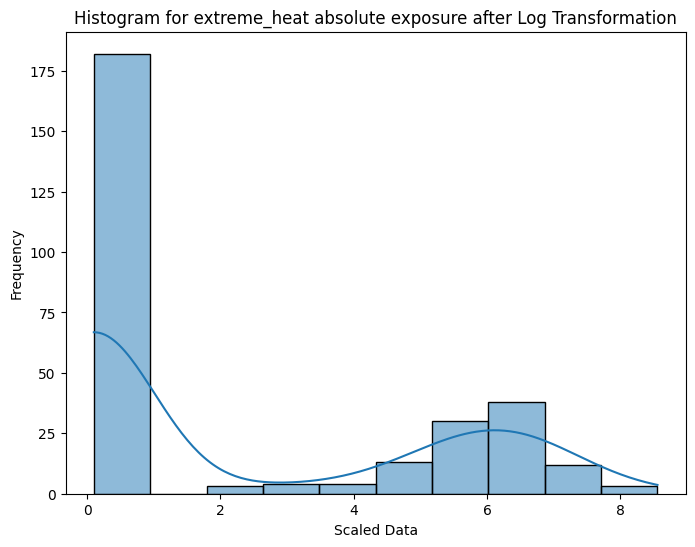

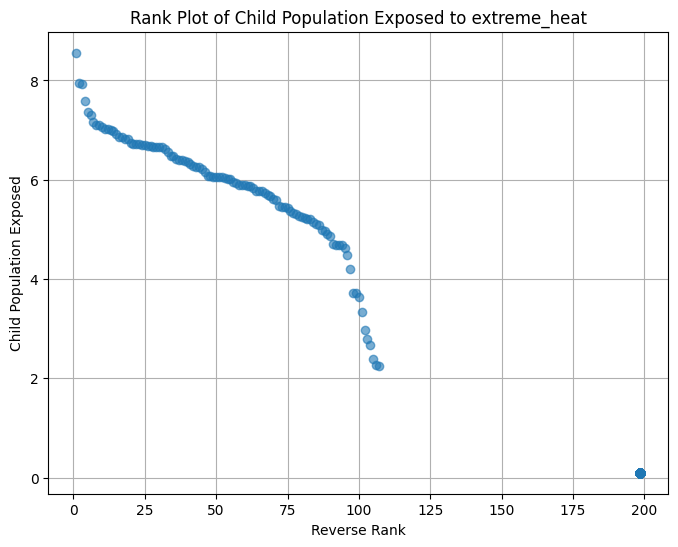

processed : fire_frequency min: 0.1 max: 7.35150683181298
fire_frequency: Log Transformation and Scaling - skew=-0.042, kurtosis=-1.606
IQR processed : fire_frequency min: -7.380274982347231 max: 12.567124970578718


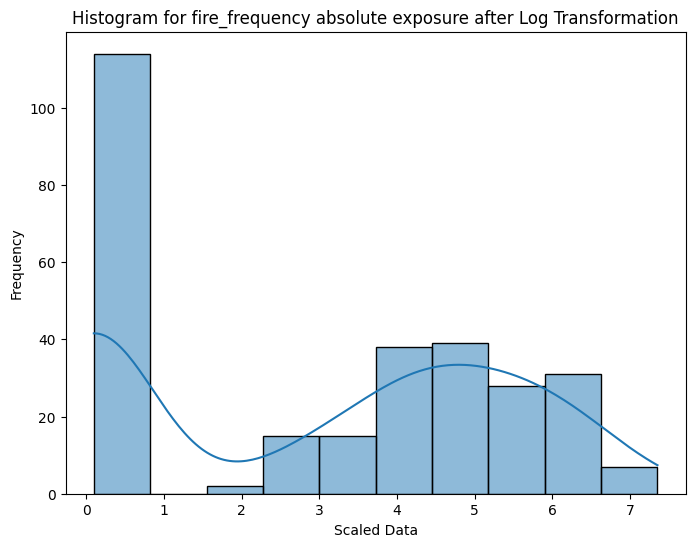

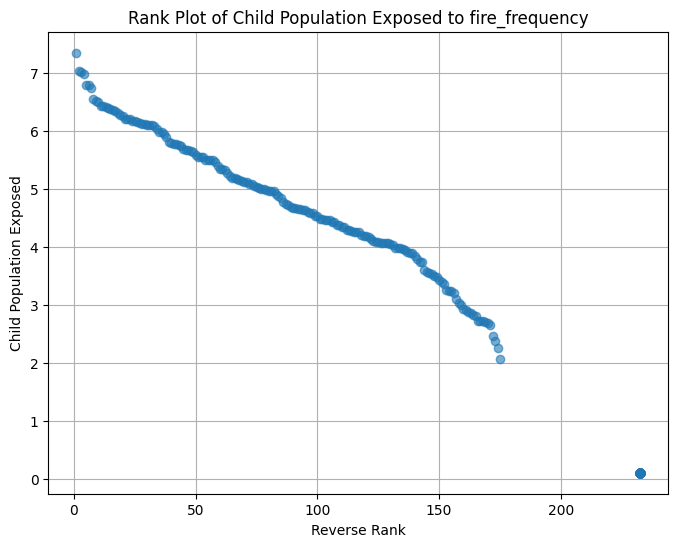

processed : fire_FRP min: 0.1 max: 6.878384119267611
fire_FRP: Log Transformation and Scaling - skew=-0.253, kurtosis=-1.631
IQR processed : fire_FRP min: -7.6177470940534455 max: 12.96291182342241


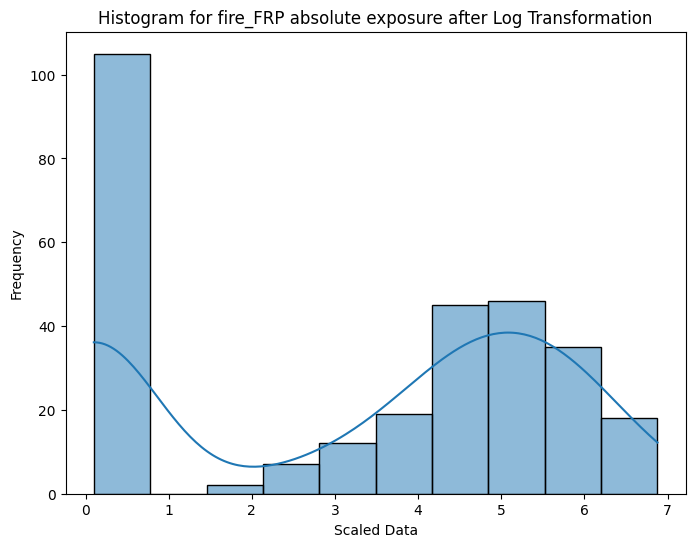

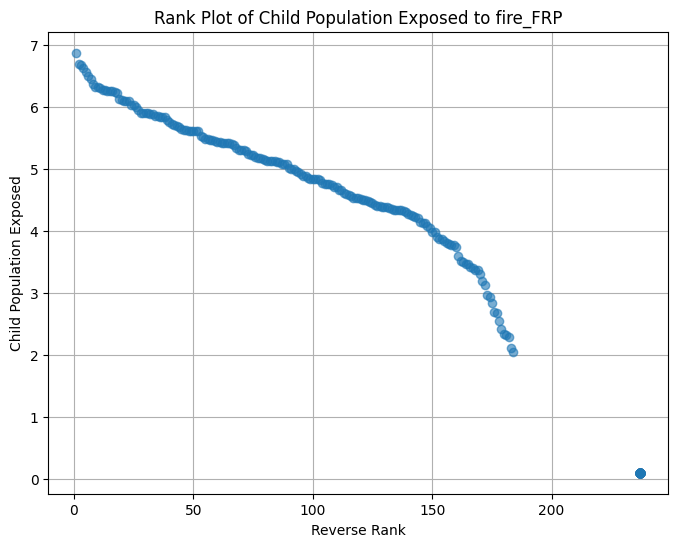

processed : sand_dust min: 0.1 max: 7.208279485164838
sand_dust: Log Transformation and Scaling - skew=0.391, kurtosis=-1.326
IQR processed : sand_dust min: -6.593752496700938 max: 11.25625416116823


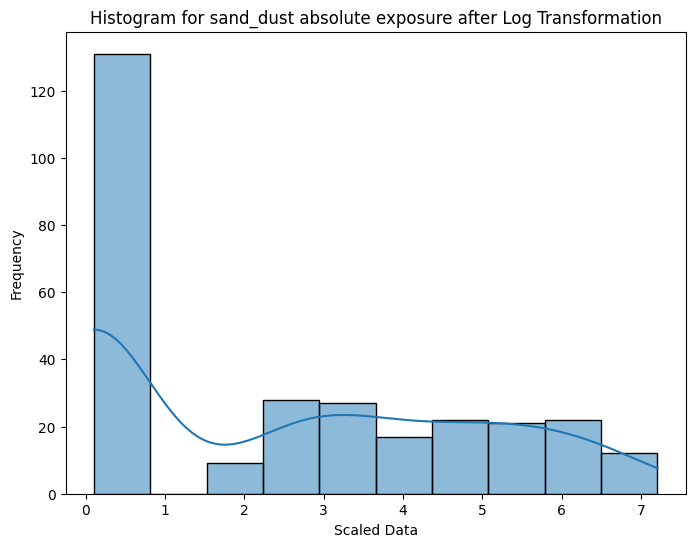

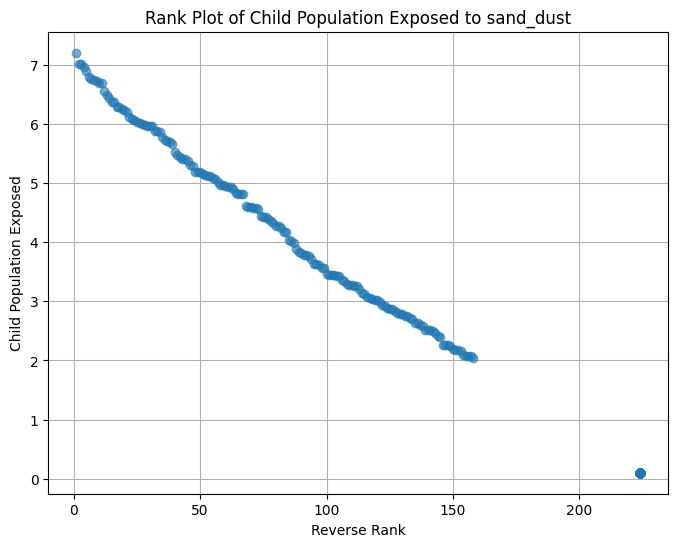

processed : vectorborne_malariapv min: 0.1 max: 8.523552272955882
vectorborne_malariapv: Log Transformation and Scaling - skew=1.800, kurtosis=1.601
IQR processed : vectorborne_malariapv min: 0.1 max: 0.1


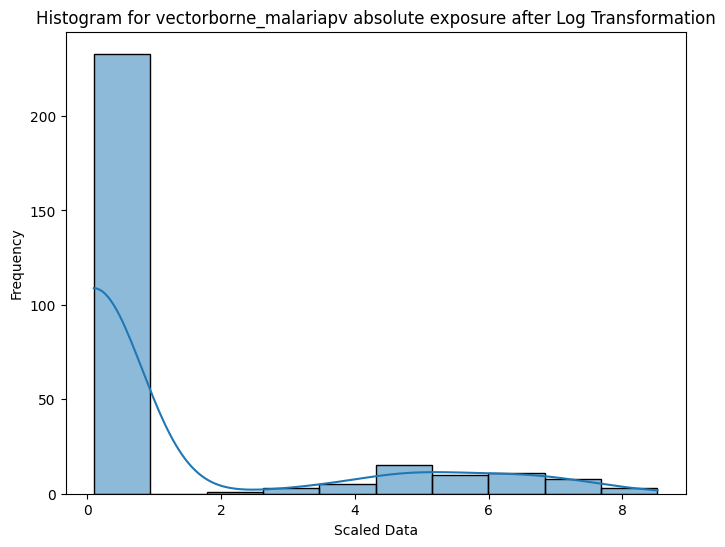

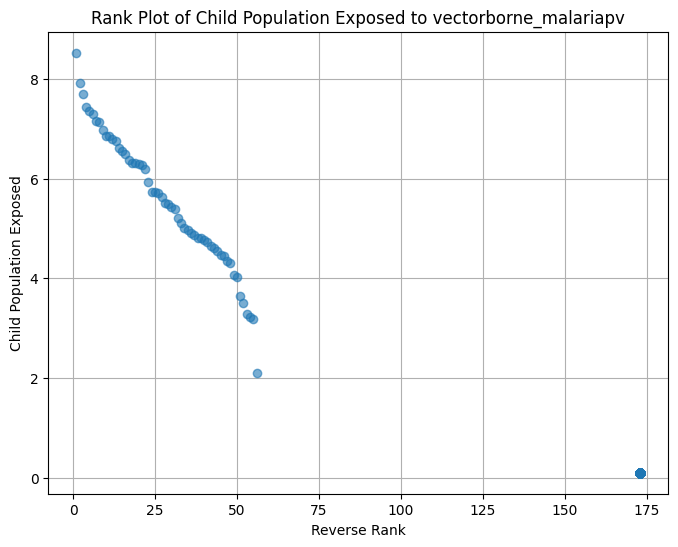

processed : vectorborne_malariapf min: 0.1 max: 8.043922938653115
vectorborne_malariapf: Log Transformation and Scaling - skew=1.037, kurtosis=-0.717
IQR processed : vectorborne_malariapf min: -6.41451324608469 max: 10.957522076807816


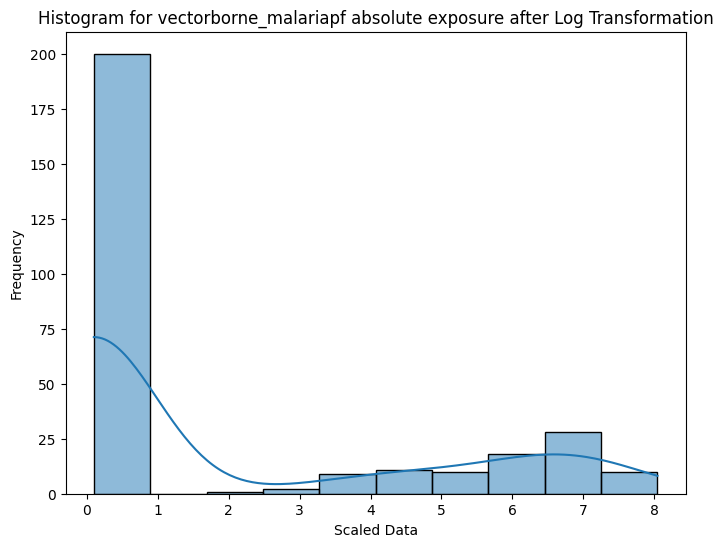

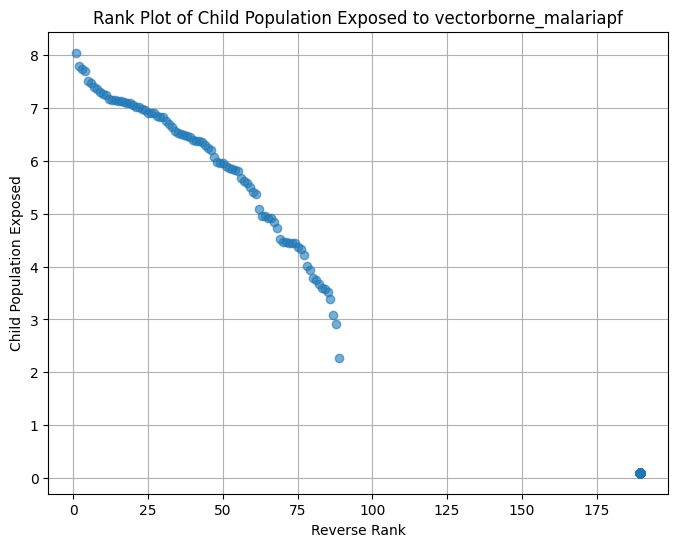

processed : air_pollution min: 0.1 max: 8.627837322860318
air_pollution: Log Transformation and Scaling - skew=-0.106, kurtosis=-1.788
IQR processed : air_pollution min: -9.535923068801614 max: 16.159871781336022


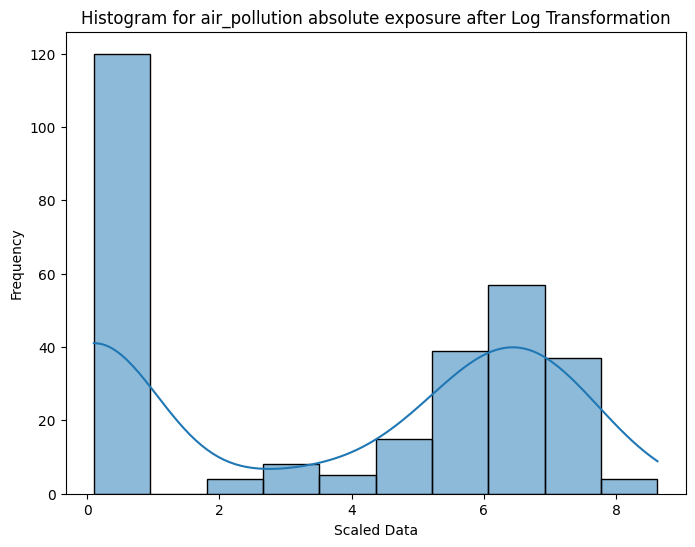

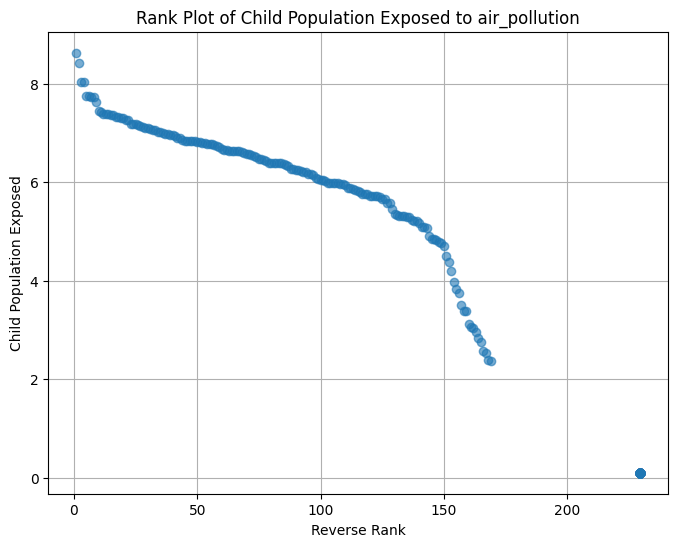

In [12]:

# Folder containing the CSV files
path = r'/content/drive/MyDrive/p1_exposure'
all_files = glob.glob(path + "/*.csv")

for file in all_files:
    # Exclude the specified file
    df = pd.read_csv(file, index_col=None, header=0)
    filename_only = file.split('/')[-1]
    hazard_name = '_'.join(filename_only.split('_')[:2])

    if 'ISO3' not in df.columns or 'child_population_exposed' not in df.columns:
        continue  # Skip files missing required columns

    df = df[['ISO3', 'child_population_exposed']].dropna()

    # Apply iterative trimming
    # before data trimming, log10 is applied to values higher than 100 otherwise asign 0.1
    df['child_population_exposed'] = df['child_population_exposed'].dropna().values  # Ensure no NaNs
    with np.errstate(divide='ignore'):
      df['child_population_exposed'] = np.where(
          df['child_population_exposed'] > 100,
          np.log10(df['child_population_exposed']),
          0.1
      )
    trimmed_values, min_trimmed, max_trimmed = trim_outliers_iteratively(df['child_population_exposed'])
    iqr_trimmed_values, iqr_lower_bound, iqr_upper_bound = boxplot_outlier_detection(df['child_population_exposed'])

    print(f"processed : {hazard_name} min: {min_trimmed} max: {max_trimmed}" )
    current_skew = skew(trimmed_values)
    current_kurtosis = kurtosis(trimmed_values)
    print(f"{hazard_name}: Log Transformation and Scaling - skew={current_skew:.3f}, kurtosis={current_kurtosis:.3f}")
    print(f"IQR processed : {hazard_name} min: {iqr_lower_bound} max: {iqr_upper_bound}" )

    # Plot histogram and normality check
    plt.figure(figsize=(8, 6))
    sns.histplot(df['child_population_exposed'], kde=True)
    plt.title(f"Histogram for {hazard_name} absolute exposure after Log Transformation")
    plt.xlabel("Scaled Data")
    plt.ylabel("Frequency")
    plt.show()

    # Compute ranks in reverse order
    df['rank_reverse'] = df['child_population_exposed'].rank(method='average', ascending=False)
    plt.figure(figsize=(8, 6))
    plt.plot(df['rank_reverse'], df['child_population_exposed'], marker='o', linestyle='', alpha=0.6)
    plt.xlabel("Reverse Rank")
    plt.ylabel("Child Population Exposed")
    plt.title(f"Rank Plot of Child Population Exposed to {hazard_name}")
    plt.grid(True)
    plt.show()



0.0
75.66605864190983
Processed: river_flood | Min: 0.3770921673435198 | Max: 33.37631260756561
river_flood: Log Transformation - skew=1.712, kurtosis=3.237
IQR processed : river_flood min: -362457.1023051606 max: 604095.170508601


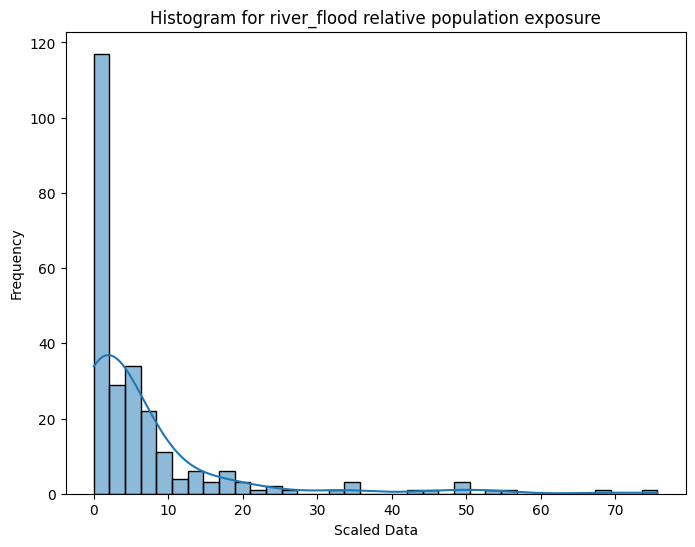

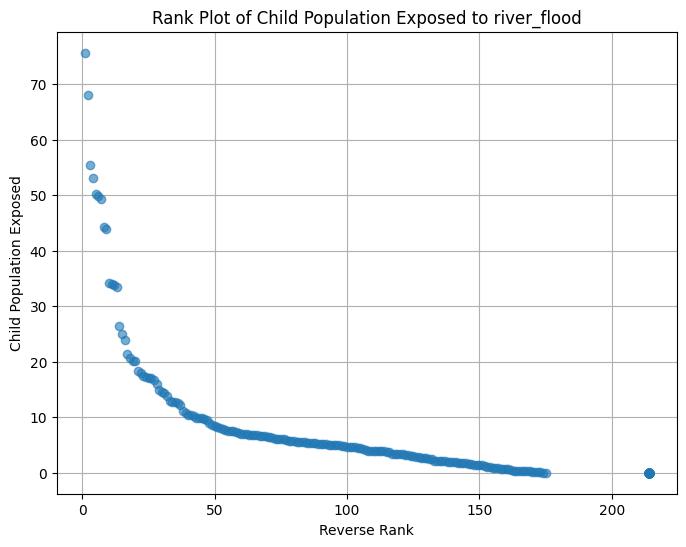

0.0
79.15911194405135
Processed: coastal_flood | Min: 0.02225776690158144 | Max: 3.4689260010724525
coastal_flood: Log Transformation - skew=1.901, kurtosis=3.131
IQR processed : coastal_flood min: -5692.630961350916 max: 9487.718268918194


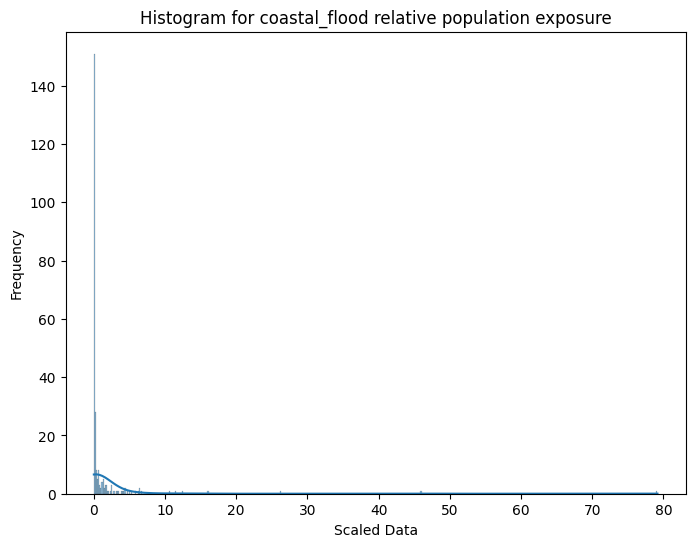

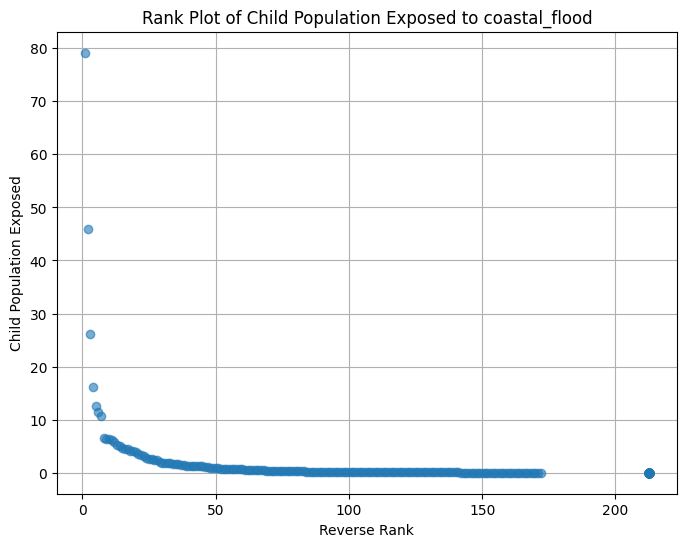

0.0
100.0
Processed: pluvial_flood | Min: 0.47007883943180667 | Max: 99.99925702015402
pluvial_flood: Log Transformation - skew=-0.248, kurtosis=-0.817
IQR processed : pluvial_flood min: -3668849.9503245545 max: 6114749.917207591


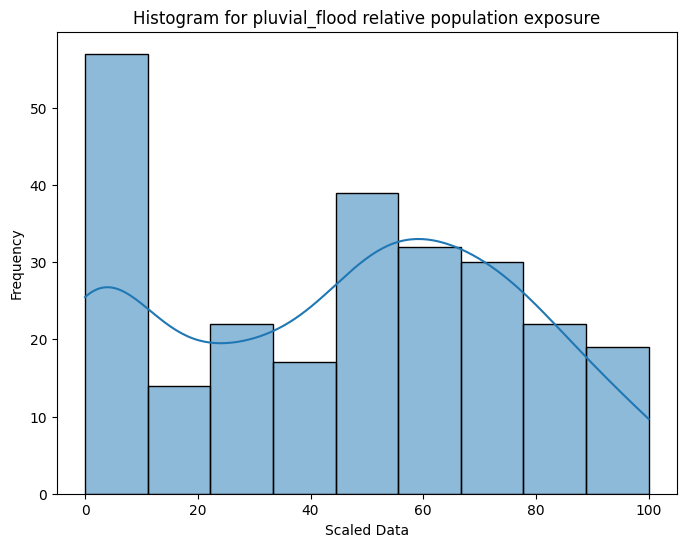

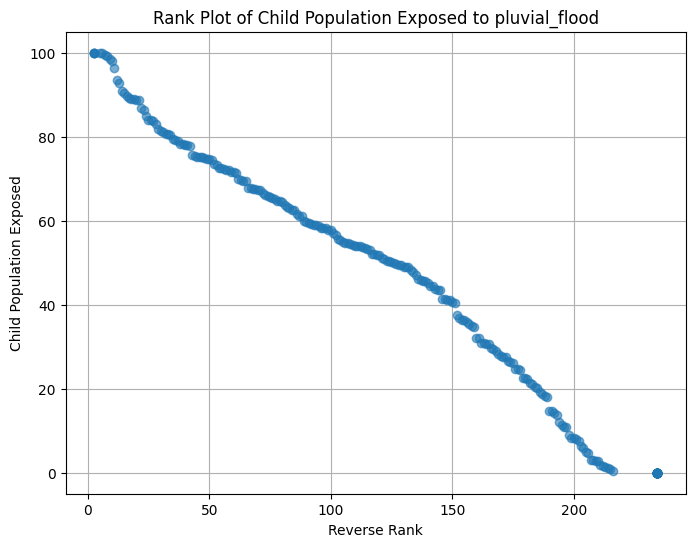

0.0
100.0
Processed: drought_sma | Min: 0.020251005088819884 | Max: 99.98804572947112
drought_sma: Log Transformation - skew=1.281, kurtosis=1.756
IQR processed : drought_sma min: -749218.524653927 max: 1248697.5410898782


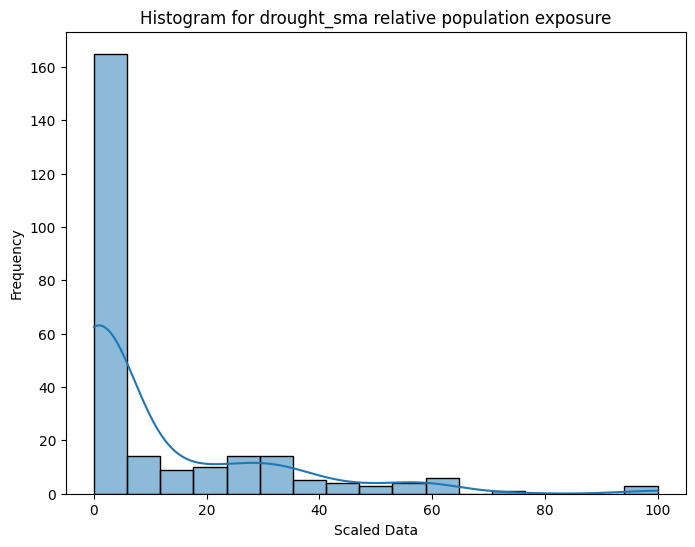

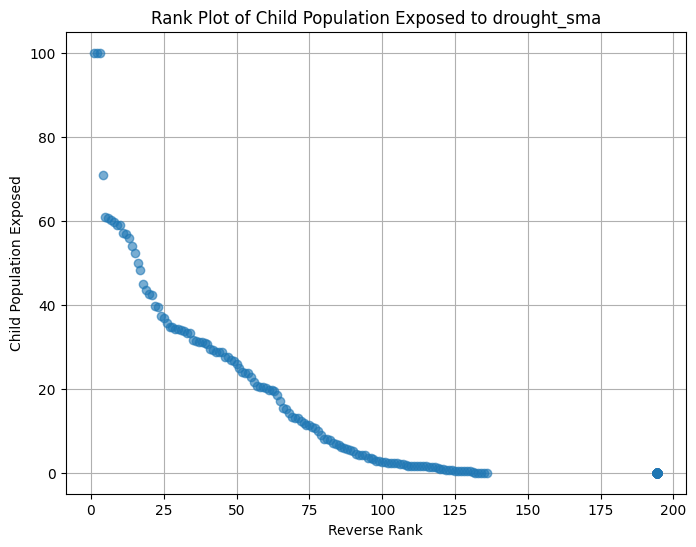

0.0
88.88359329434759
Processed: agricultural_drought | Min: 4.5382296623293224e-06 | Max: 80.14623021365159
agricultural_drought: Log Transformation - skew=1.634, kurtosis=1.717
IQR processed : agricultural_drought min: -308007.7799167741 max: 513346.29986129014


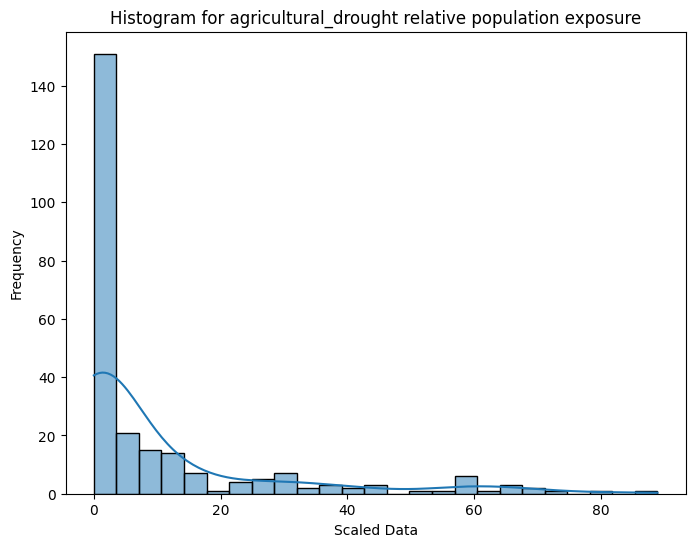

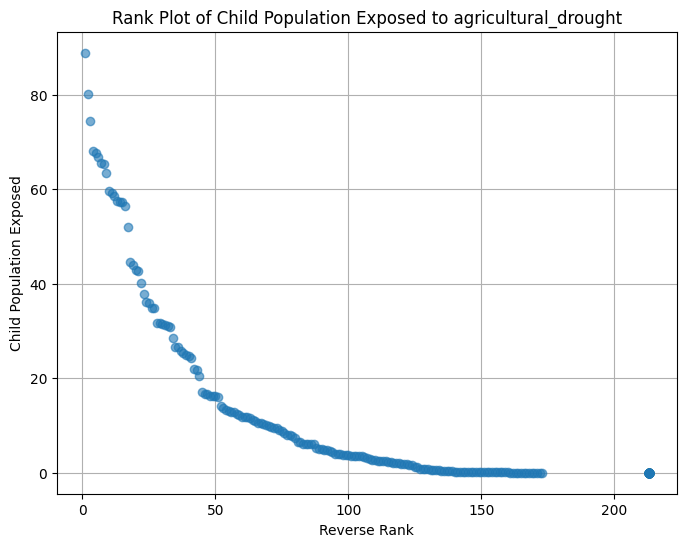

0.0
100.00000000000003
Processed: heatwave_frequency | Min: 5.9922715214051307e-05 | Max: 100.0
heatwave_frequency: Log Transformation - skew=-0.065, kurtosis=-1.388
IQR processed : heatwave_frequency min: -3087031.738115197 max: 5145052.896858662


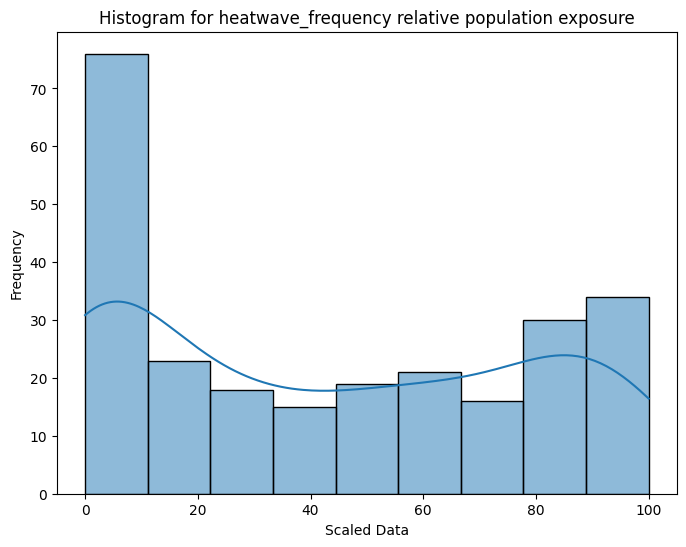

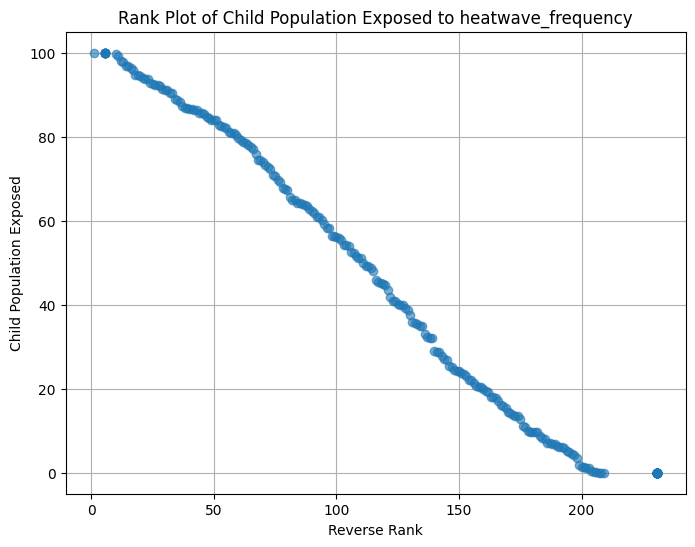

0.0
100.0
Processed: drought_spi | Min: 0.00026141808235996745 | Max: 99.99597599828378
drought_spi: Log Transformation - skew=-0.128, kurtosis=-1.436
IQR processed : drought_spi min: -2589067.971854977 max: 4315113.286424961


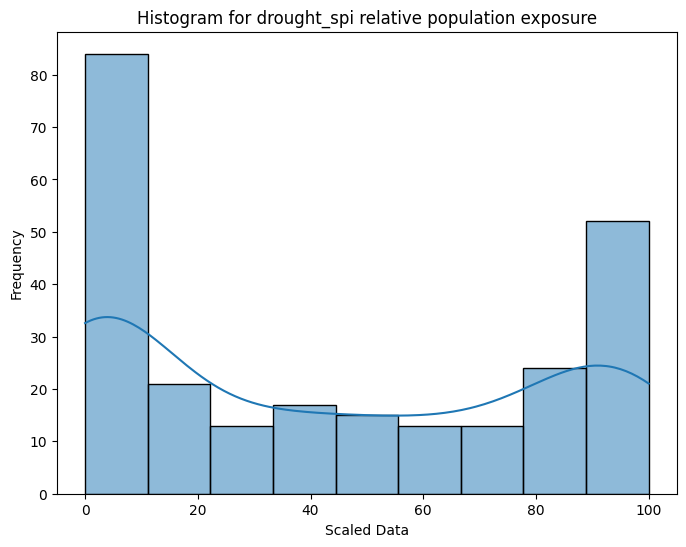

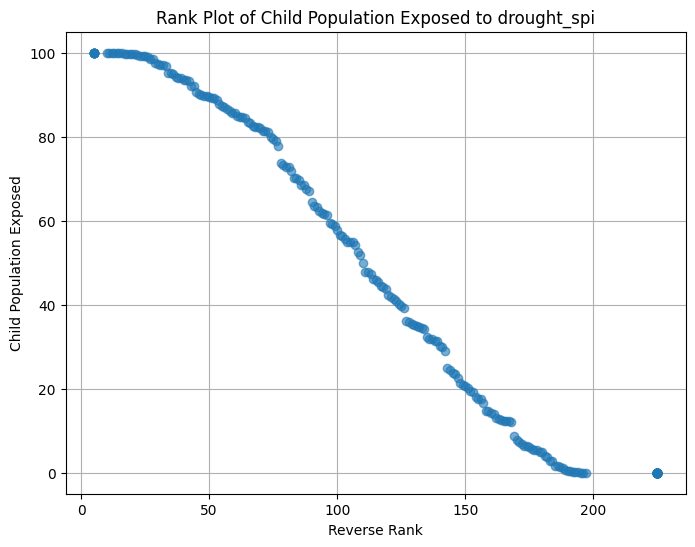

0.0
100.0
Processed: heatwave_duration | Min: 0.010867345696262394 | Max: 99.99999999999997
heatwave_duration: Log Transformation - skew=-0.095, kurtosis=-1.194
IQR processed : heatwave_duration min: -3536223.3145783264 max: 5893705.524297211


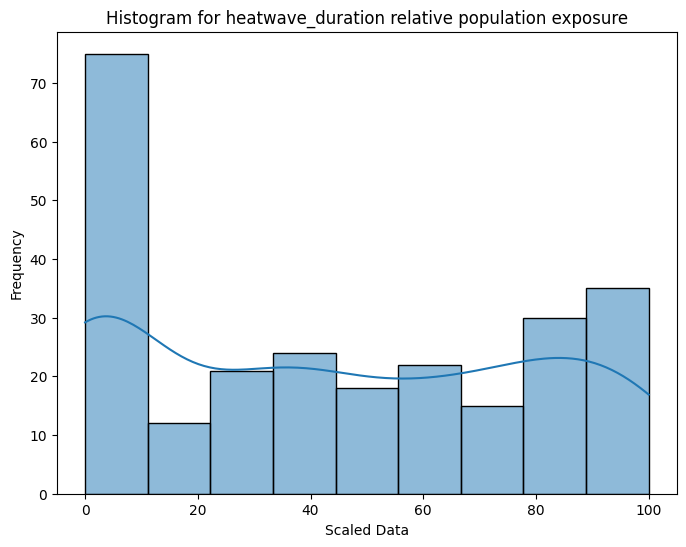

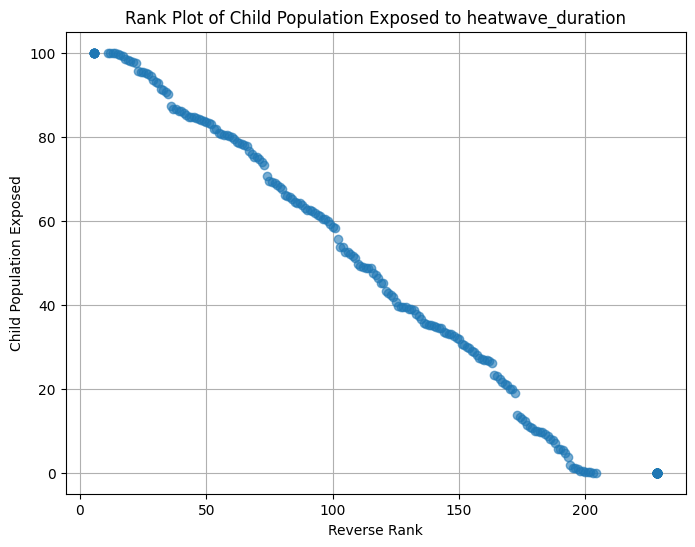

0.0
100.00000000000003
Processed: tropical_storm | Min: 1.5796431178464565e-05 | Max: 100.0
tropical_storm: Log Transformation - skew=-1.221, kurtosis=-0.199
IQR processed : tropical_storm min: -69305.29176546268 max: 115508.81960910447


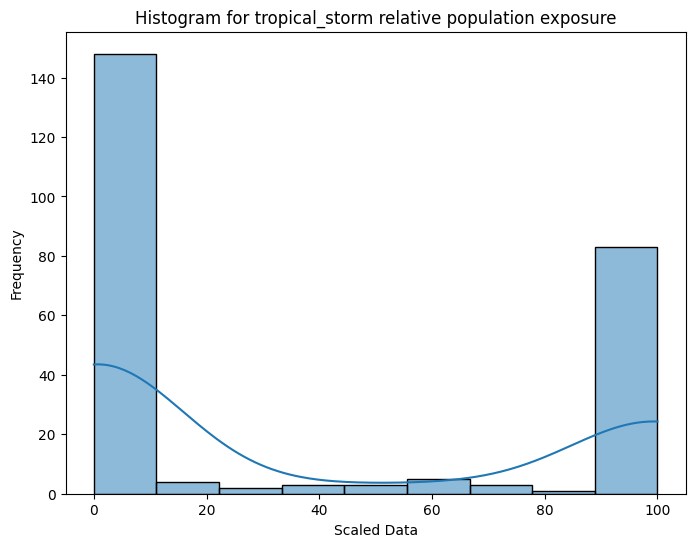

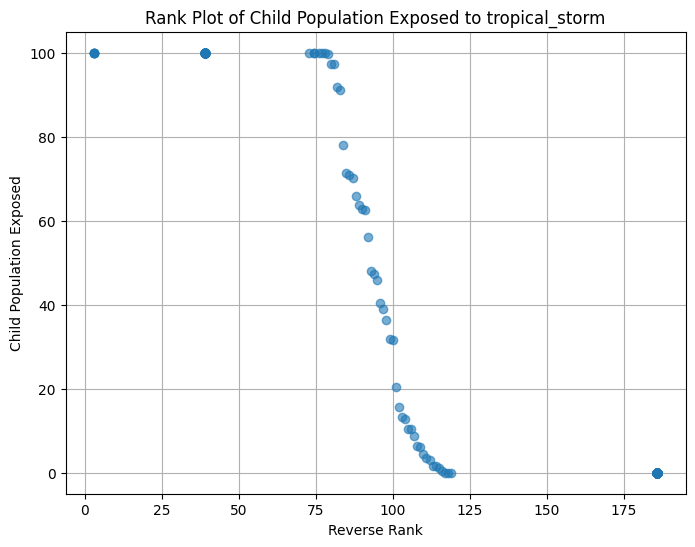

0.0
100.00000000000003
Processed: heatwave_severity | Min: 3.6922053871115674e-05 | Max: 100.0
heatwave_severity: Log Transformation - skew=0.041, kurtosis=-1.660
IQR processed : heatwave_severity min: -246464.5294979703 max: 410774.2158299505


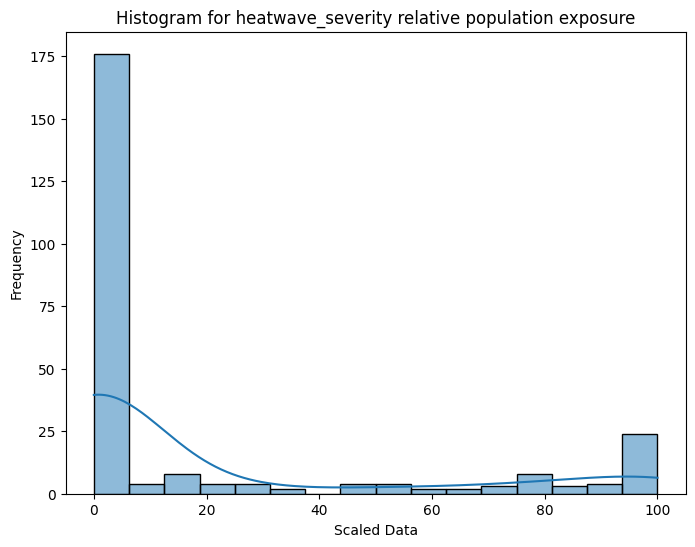

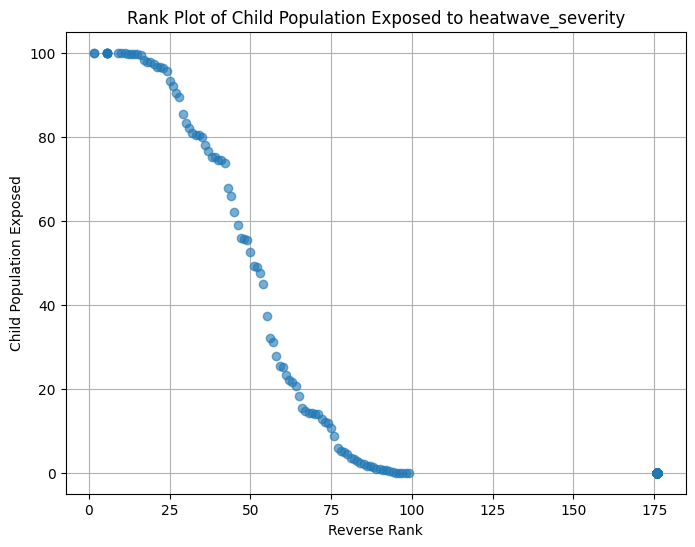

0.0
100.00000000000003
Processed: extreme_heat | Min: 0.003774062717815601 | Max: 100.0
extreme_heat: Log Transformation - skew=0.585, kurtosis=-1.154
IQR processed : extreme_heat min: -423652.87228764687 max: 706088.1204794114


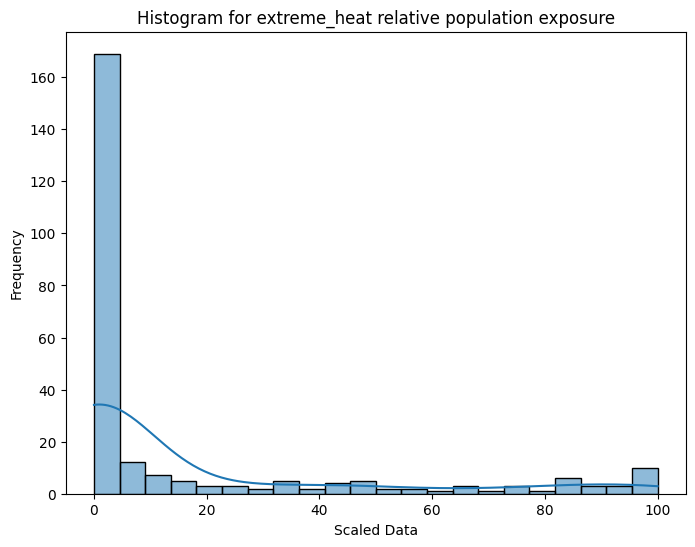

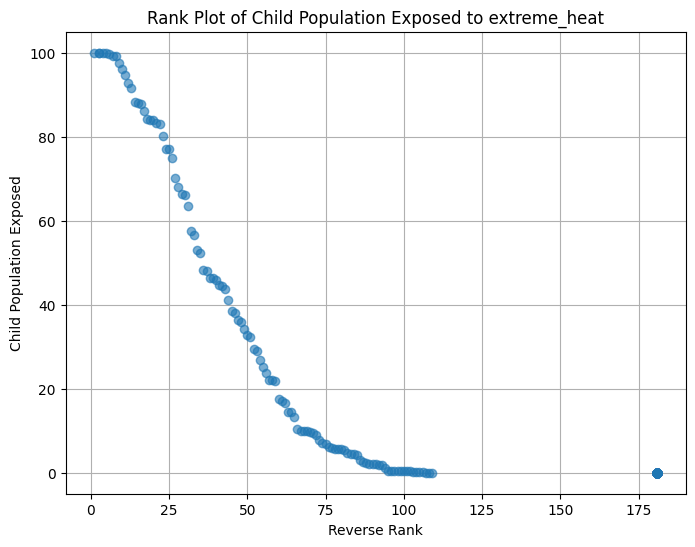

0.0
74.63166033033872
Processed: fire_frequency | Min: 0.08099011222476779 | Max: 27.642187031083925
fire_frequency: Log Transformation - skew=1.831, kurtosis=3.370
IQR processed : fire_frequency min: -183206.6557924291 max: 305344.4263207152


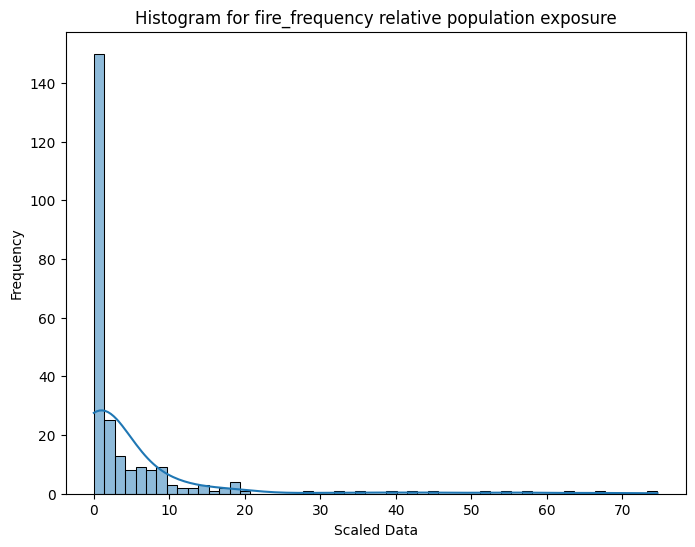

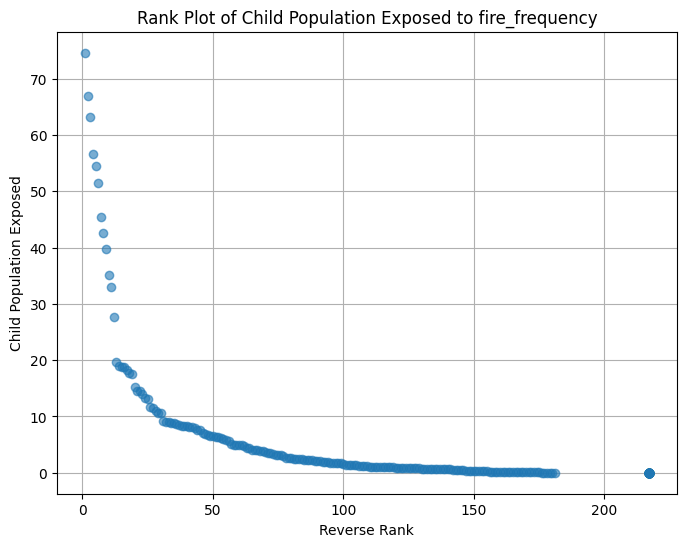

0.0
51.84454925439594
Processed: fire_FRP | Min: 0.1112134294412687 | Max: 22.407948820267737
fire_FRP: Log Transformation - skew=1.778, kurtosis=3.277
IQR processed : fire_FRP min: -263788.5790225272 max: 439647.63170421205


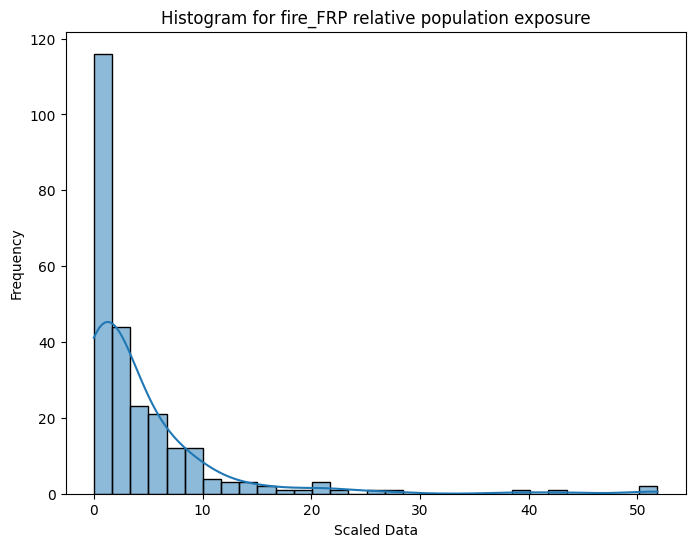

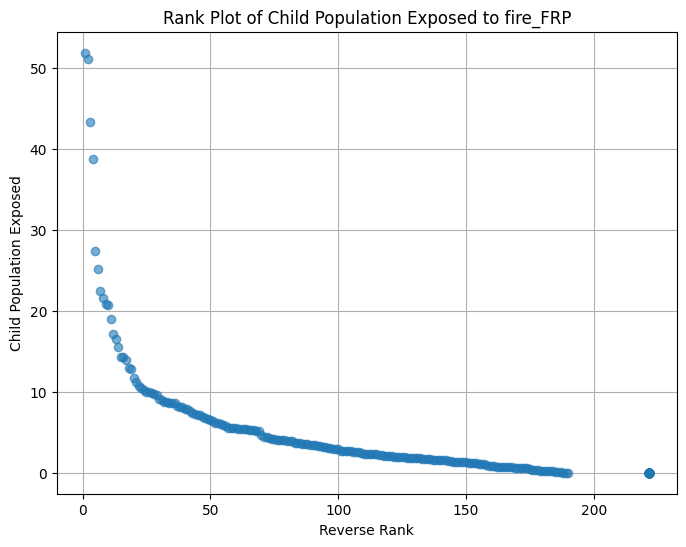

0.0
100.0
Processed: sand_dust | Min: 0.011337180998522623 | Max: 14.989477152981992
sand_dust: Log Transformation - skew=1.960, kurtosis=3.394
IQR processed : sand_dust min: -54776.32902235353 max: 91293.88170392255


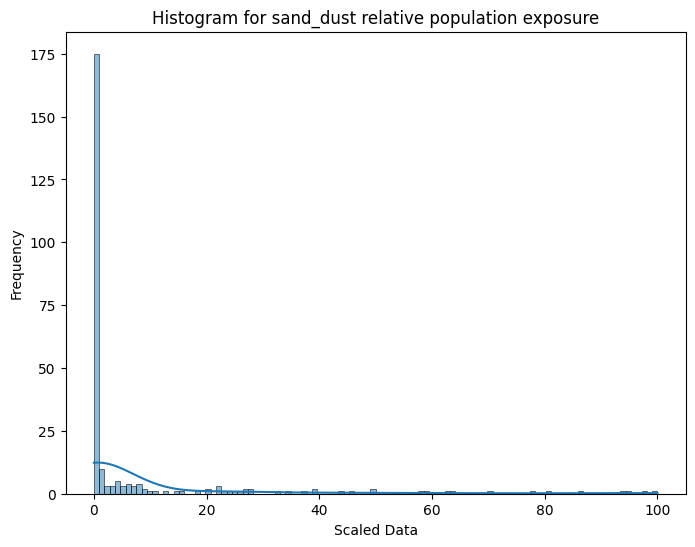

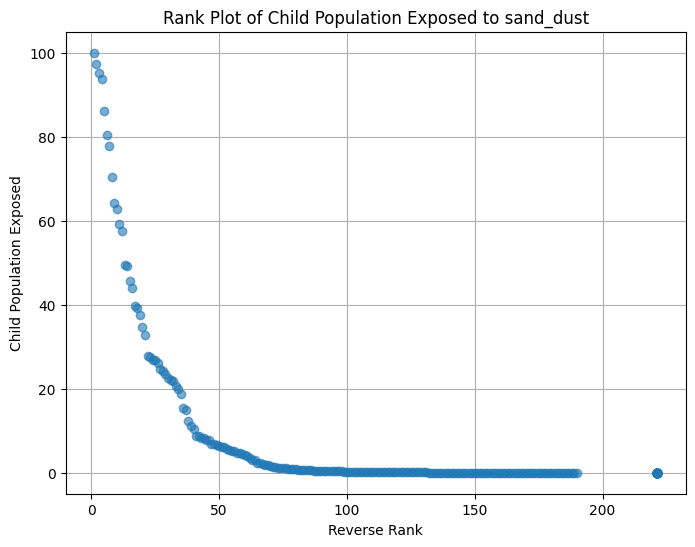

0.0
99.97254347155337
Processed: vectorborne_malariapv | Min: 0.0005498064205675533 | Max: 99.94323508626807
vectorborne_malariapv: Log Transformation - skew=0.524, kurtosis=-1.476
IQR processed : vectorborne_malariapv min: 0.0 max: 0.0


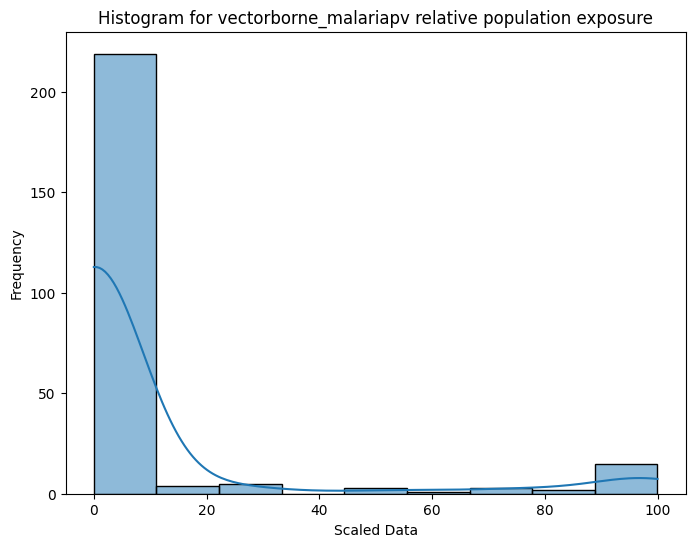

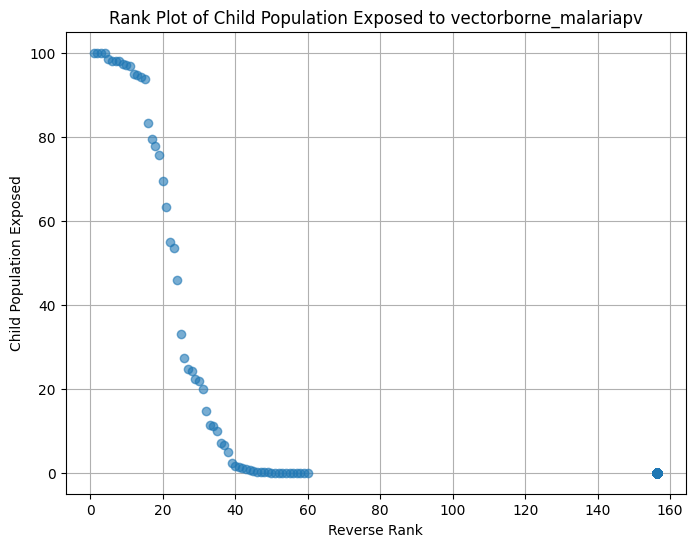

0.0
100.00000000000003
Processed: vectorborne_malariapf | Min: 0.00012697936768813964 | Max: 100.0
vectorborne_malariapf: Log Transformation - skew=-0.212, kurtosis=-1.800
IQR processed : vectorborne_malariapf min: -41600.64744758607 max: 69334.41241264345


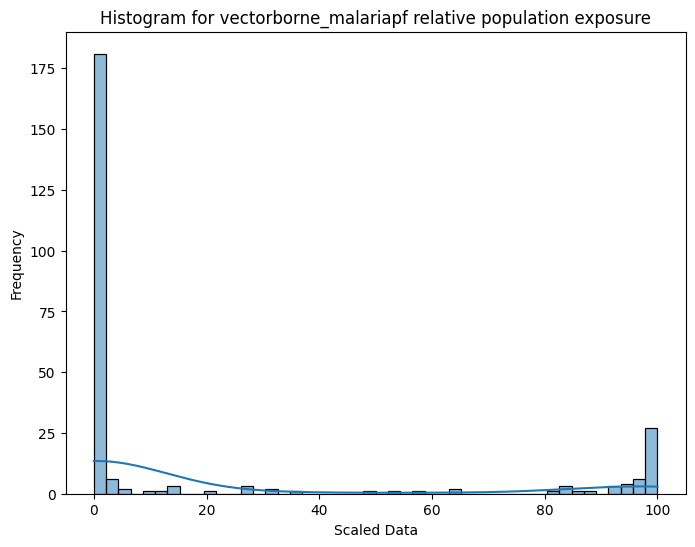

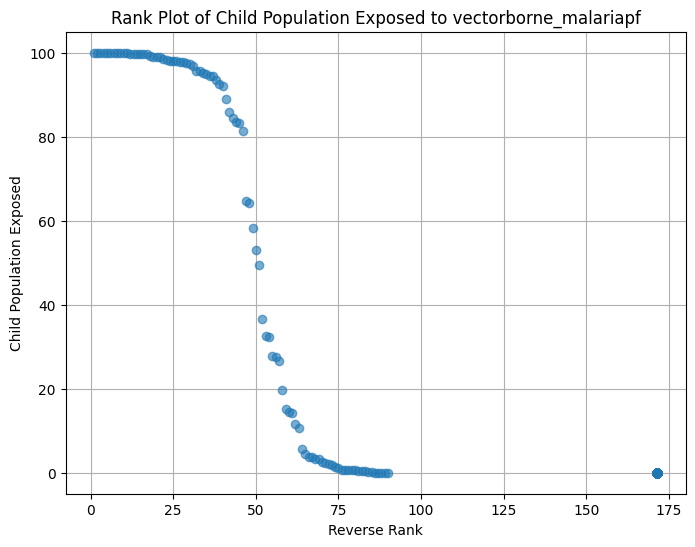

0.0
100.00000000000007
Processed: air_pollution | Min: 1.6969882529015185e-05 | Max: 100.0
air_pollution: Log Transformation - skew=-0.982, kurtosis=-0.419
IQR processed : air_pollution min: -5012333.640144506 max: 8353889.400240842


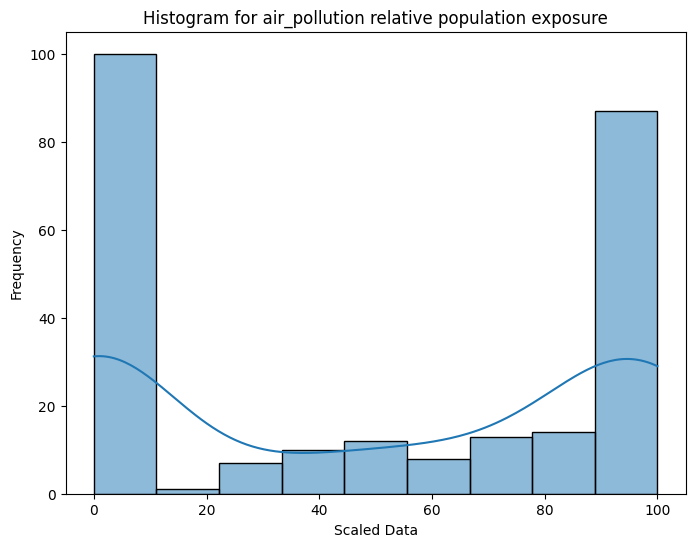

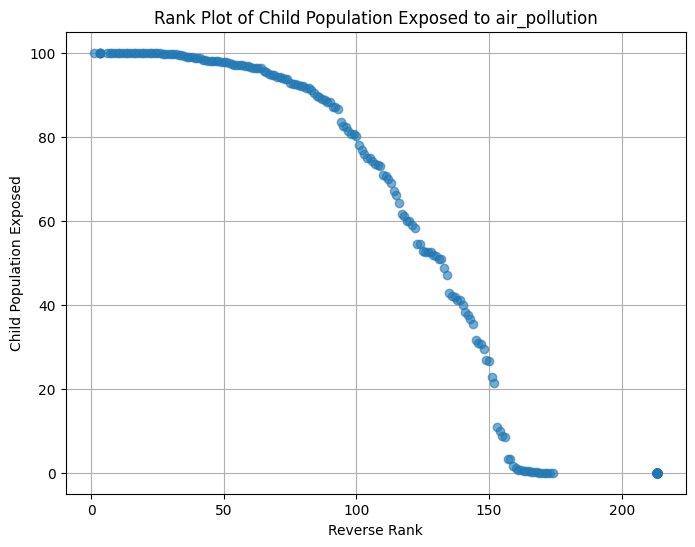

In [13]:

# Load total child population data
total_pop_df = pd.read_csv('/content/drive/MyDrive/CCRI_results_misc/child_pop_sum_adm0.csv', index_col=None, header=0)

if 'ISO3' not in total_pop_df.columns or 'child_population' not in total_pop_df.columns:
    raise ValueError("Total population file is missing required columns: 'ISO3' and 'child_population'.")

# # Dictionary to map total child population by ISO3
# total_population_map = total_pop_df.set_index('ISO3')['child_population'].to_dict()

# Process each hazard file
for file in all_files:
    # Exclude the total population file
    df = pd.read_csv(file, index_col=None, header=0)
    filename_only = file.split('/')[-1]
    hazard_name = '_'.join(filename_only.split('_')[:2])
    df = df.merge(total_pop_df[['ISO3', 'name', 'child_population']], on=['ISO3', 'name'], how='left')

    if 'ISO3' not in df.columns or 'child_population_exposed' not in df.columns:
        continue  # Skip files missing required columns

    df = df[['ISO3', 'child_population_exposed','child_population']].dropna()
    df['relative_population_exposure'] = np.where(
        (df['child_population'] > 0) & (~df['child_population'].isna()),
        (df['child_population_exposed'] / df['child_population']) * 100,
        np.nan  # Assign NaN instead of inf
    )

    print( df['relative_population_exposure'].min())
    print( df['relative_population_exposure'].max())
    # Apply iterative trimming
    # Trim outliers
    trimmed_values, min_trimmed, max_trimmed = trim_outliers_iteratively(df['relative_population_exposure'])
    iqr_trimmed_values, iqr_lower_bound, iqr_upper_bound = boxplot_outlier_detection(df['child_population_exposed'])
    # Check if there are enough values to calculate skewness and kurtosis
    if len(trimmed_values) > 2:
        current_skew = skew(trimmed_values)
        current_kurtosis = kurtosis(trimmed_values)
    else:
        current_skew, current_kurtosis = np.nan, np.nan

    print(f"Processed: {hazard_name} | Min: {min_trimmed} | Max: {max_trimmed}" )
    print(f"{hazard_name}: Log Transformation - skew={current_skew:.3f}, kurtosis={current_kurtosis:.3f}")
    print(f"IQR processed : {hazard_name} min: {iqr_lower_bound} max: {iqr_upper_bound}" )

    # Plot histogram and normality check
    plt.figure(figsize=(8, 6))
    sns.histplot(df['relative_population_exposure'], kde=True)
    plt.title(f"Histogram for {hazard_name} relative population exposure")
    plt.xlabel("Scaled Data")
    plt.ylabel("Frequency")
    plt.show()


    # Compute ranks in reverse order
    df['rank_reverse'] = df['relative_population_exposure'].rank(method='average', ascending=False)
    plt.figure(figsize=(8, 6))
    plt.plot(df['rank_reverse'], df['relative_population_exposure'], marker='o', linestyle='', alpha=0.6)
    plt.xlabel("Reverse Rank")
    plt.ylabel("Child Population Exposed")
    plt.title(f"Rank Plot of Child Population Exposed to {hazard_name}")
    plt.grid(True)
    plt.show()




In [14]:
import os
import numpy as np
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis

# Define file paths
exposure_path = "/content/drive/MyDrive/p1_exposure"
total_population_file = "/content/drive/MyDrive/CCRI_results_misc/child_pop_sum_adm0.csv"

# Load total child population data
total_pop_df = pd.read_csv(total_population_file, usecols=['ISO3', 'name', 'child_population'])

# Ensure unique ISO3-name pairs before merging
total_pop_df = total_pop_df.groupby(['ISO3', 'name'], as_index=False).agg({'child_population': 'mean'})

# Get all CSV files for exposure
exposure_files = glob.glob(os.path.join(exposure_path, "*.csv"))

# Initialize empty list for processed data
exposure_data_list = []

### **Process Each File in One Loop**
for file in exposure_files:
    if file == total_population_file:
        continue  # Skip total population file

    df = pd.read_csv(file)  # Read full file to check available columns
    filename_only = os.path.basename(file)
    hazard_name = '_'.join(filename_only.split('_')[:2])  # Extract hazard name

    # Ensure required columns exist
    required_cols = {'ISO3', 'name', 'child_population_exposed'}
    if not required_cols.issubset(df.columns):
        print(f"Skipping {file}: Missing columns {required_cols - set(df.columns)}")
        continue  # Skip if required columns are missing

    df.dropna(subset=['child_population_exposed'], inplace=True)

    ### **Step 1: Absolute Exposure Processing**
    # Log transform with clipping for values >100, otherwise assign 0.1
    df['absolute_exposure'] = np.where(df['child_population_exposed'] > 100,
                                       np.log10(df['child_population_exposed'].clip(lower=1)),  # Clip to avoid log10(0)
                                       0.1)
    #open min_max data file and use them to normalize the values
    df_min_max = pd.read_csv('/content/drive/MyDrive/CCRI_results_misc/p1_min_max.csv')
    min_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'abs'),'min'].values[0]
    max_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'abs'),'max'].values[0]

    # clip to min max
    df['absolute_exposure'] = np.clip(df['absolute_exposure'], min_trimmed, max_trimmed)

    # Normalize using min_trimmed and max_trimmed
    df['absolute_value_normalized'] = 10 * (df['absolute_exposure'] - min_trimmed) / (max_trimmed - min_trimmed)
    df['absolute_min'] = min_trimmed
    df['absolute_max'] = max_trimmed

    ### **Step 2: Relative Exposure Processing**
    # Merge with total population data
    df = df.merge(total_pop_df, on=['ISO3', 'name'], how='left')

    # Compute relative exposure (%)
    df['relative_exposure'] = np.where(
        (df['child_population'] > 0) & (~df['child_population'].isna()),
        (df['child_population_exposed'] / df['child_population']) * 100,
        0
    )

    #get min max values for relative exposures
    min_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'rel'),'min'].values[0]
    max_trimmed = df_min_max.loc[(df_min_max['filename'] == hazard_name) & (df_min_max['type'] == 'rel'),'max'].values[0]

    # Normalize relative exposure
    df['relative_exposure'] = np.clip(df['relative_exposure'], min_trimmed, max_trimmed)
    df['relative_value_normalized'] = 10 * (df['relative_exposure'] - min_trimmed) / (max_trimmed - min_trimmed)
    df['relative_min'] = min_trimmed
    df['relative_max'] = max_trimmed

    # Rename columns for final merging
    df.rename(columns={
        'absolute_value_normalized': hazard_name + '_absolute',
        'absolute_min': hazard_name + '_absolute_min',
        'absolute_max': hazard_name + '_absolute_max',
        'relative_value_normalized': hazard_name + '_relative',
        'relative_min': hazard_name + '_relative_min',
        'relative_max': hazard_name + '_relative_max'
    }, inplace=True)

    # Append processed data to list
    exposure_data_list.append(df[['ISO3', 'name',
                                  hazard_name + '_absolute', hazard_name + '_absolute_min', hazard_name + '_absolute_max',
                                  hazard_name + '_relative', hazard_name + '_relative_min', hazard_name + '_relative_max']])

### **Final Merge Step**
# Concatenate all processed DataFrames
merged_exposure_df = pd.concat(exposure_data_list, axis=1).drop_duplicates(subset=['ISO3', 'name'])

# Ensure no duplicate columns before merging
merged_exposure_df = merged_exposure_df.loc[:, ~merged_exposure_df.columns.duplicated()]

# Save merged exposure data
output_path = "/content/drive/MyDrive/CCRI_results_misc/Merged_Exposure_Data.csv"
merged_exposure_df.to_csv(output_path, index=False)
print(f"Merged exposure data saved to {output_path}")


Merged exposure data saved to /content/drive/MyDrive/CCRI_results_misc/Merged_Exposure_Data.csv
